In [1]:
from BSDetector import *

This Notebook serves as a catalogue for all the experiments performed for testing the decomposition prompt and Strategy_QA dataset

Experiment: Plain Strategy_QA

acc 0.757399320718098


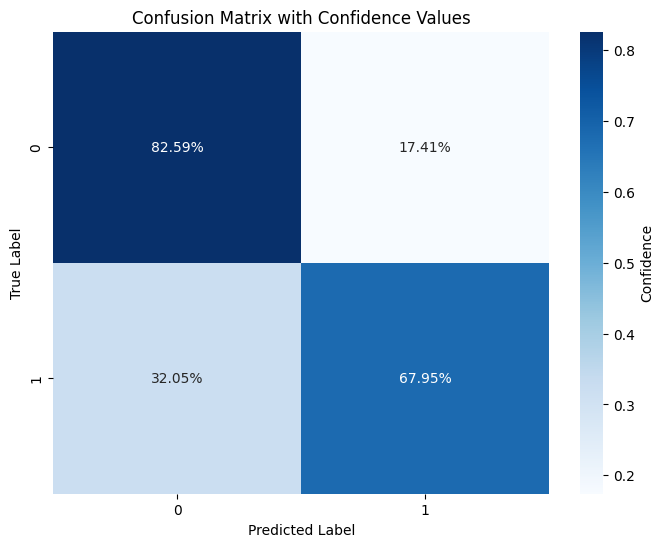

In [34]:
trimmer = Trimmer(r'\[.*\]', "[]")
df = pd.read_json("", lines=True)
df["answer"] = df["answer"].apply(lambda x: 1 if x else 0)
df["pred-answer"] = df['gpt-answer'].apply(trimmer.get_split)
pred_answers = df["pred-answer"].apply(lambda x: to_binary(x, 50))
real_answers = df["answer"].values
print('acc', accuracy_score(real_answers, pred_answers))

cf_matrix = confusion_matrix(real_answers, pred_answers)

cf_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cf_normalized, annot=True, cmap='Blues', fmt=".2%", cbar_kws={'label': 'Confidence'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Confidence Values')
plt.show()

Experiment: Strategy_QA + SampleAvgDev calibration

acc 0.7569141193595342
[0.7  0.9  0.9  ... 0.9  1.   0.72]
Brier score: 0.0


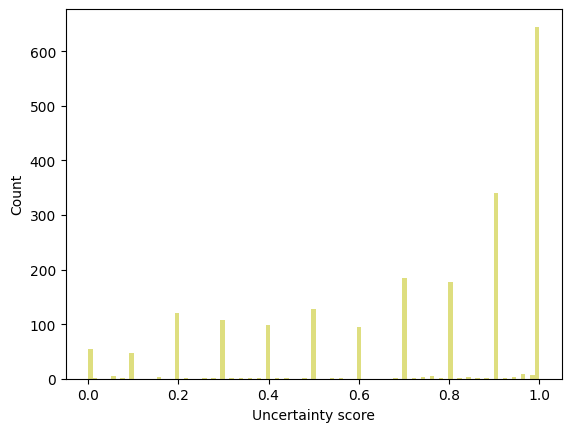

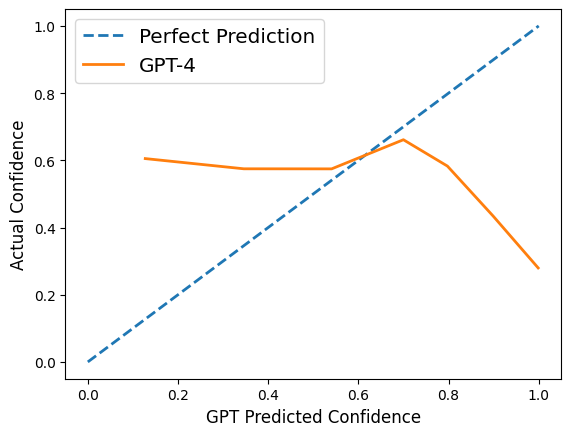

Expected Calibration Error (ECE) 0.3111104611668366


In [35]:
#Strategy_QA + consistency calibration
    
trimmer = Trimmer(r'\[.*\]', "[]")
df = pd.read_json("", lines=True)
df["answer"] = df["answer"].apply(lambda x: 1 if x else 0)
df["pred-answer"] = df['gpt-answer'].apply(trimmer.get_split)
pred_answers = df["pred-answer"].apply(lambda x: to_binary(x, 50)).values
real_answers = df["answer"].values
print('acc', accuracy_score(real_answers, pred_answers))

confidences = df["pred-answer"].apply(lambda x: abs(x - 50) / 50).values
print(confidences)
# brier score
brier_score = brier_score_loss(real_answers, real_answers, sample_weight=confidences)
print(f'Brier score: {brier_score}')

from matplotlib import pyplot
bins = np.linspace(0, 1, 100)
pyplot.hist(confidences, bins, alpha=0.5, color='y')
#pyplot.title('GPT Uncertainty scores')
pyplot.xlabel('Uncertainty score')
pyplot.ylabel('Count')
#pyplot.legend([''], loc='upper right')
pyplot.show()

reliability = calibration_curve(real_answers, confidences, n_bins=10, pos_label=1, strategy='quantile')
x_interp = np.linspace(0, 1, 10)
y_interp = np.interp(x_interp, reliability[1], reliability[0])
plt.xlabel('GPT Predicted Confidence', size=12)
plt.ylabel('Actual Confidence', size=12)
line1, = plt.plot([0, 1], [0, 1], linestyle='--', linewidth=2)
line2, = plt.plot(reliability[1], reliability[0], linewidth=2)
#line3, = plt.plot(x_interp, y_interp, linewidth=2)
legend = plt.legend(handles=[line1, line2], labels=['Perfect Prediction', 'GPT-4'], fontsize='x-large')
plt.show()
print('Expected Calibration Error (ECE)', np.mean(np.abs(reliability[0] - reliability[1])))

Experiment: Strategy_QA + verbalized confidence calibration

[0.85 0.95 0.05 ... 0.05 1.   1.  ]
Brier score: 0.21383810941062434


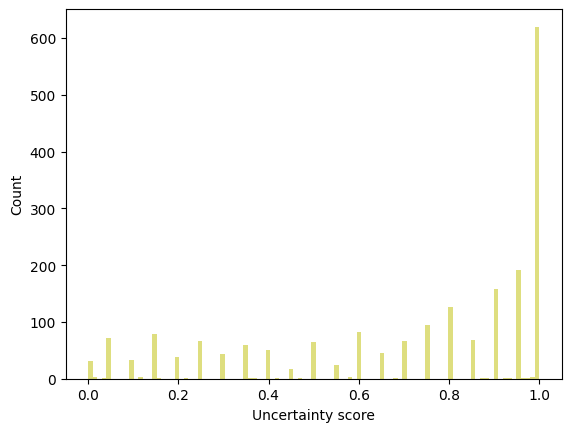

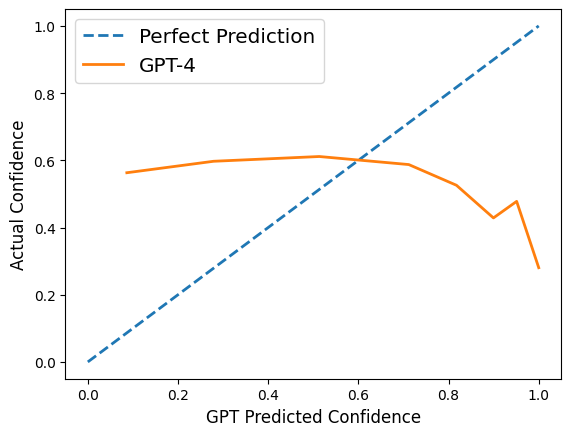

Expected Calibration Error (ECE) 0.37161328466270294


In [36]:
trimmer_truth = Trimmer(r'\[.*\]', "[]")
trimmer_uncertainty = Trimmer(r'', "")
df = pd.read_json("", lines=True)
real_answers = df["answer"].apply(lambda x: 1 if x else 0).values
df["pred-answer"] = df["gpt-answer_x"].apply(trimmer_truth.get_split)
pred_answers = df["pred-answer"].apply(lambda x: to_binary(x, 50))
confidences = df["gpt-answer_y"].apply(trimmer_uncertainty.direct_split).values / 100
print(confidences)
# brier score
brier_score = brier_score_loss(real_answers, pred_answers, sample_weight=confidences)
print(f'Brier score: {brier_score}')

from matplotlib import pyplot
bins = np.linspace(0, 1, 100)
pyplot.hist(confidences, bins, alpha=0.5, color='y')
#pyplot.title('GPT Uncertainty scores')
pyplot.xlabel('Uncertainty score')
pyplot.ylabel('Count')
#pyplot.legend([''], loc='upper right')
pyplot.show()

reliability = calibration_curve(real_answers, confidences, n_bins=10, pos_label=1, strategy='quantile')
x_interp = np.linspace(0, 1, 10)
y_interp = np.interp(x_interp, reliability[1], reliability[0])
plt.xlabel('GPT Predicted Confidence', size=12)
plt.ylabel('Actual Confidence', size=12)
line1, = plt.plot([0, 1], [0, 1], linestyle='--', linewidth=2)
line2, = plt.plot(reliability[1], reliability[0], linewidth=2)
#line3, = plt.plot(x_interp, y_interp, linewidth=2)
legend = plt.legend(handles=[line1, line2], labels=['Perfect Prediction', 'GPT-4'], fontsize='x-large')
plt.show()
print('Expected Calibration Error (ECE)', np.mean(np.abs(reliability[0] - reliability[1])))


Experiment: Strategy_QA + decomposition

acc 0.7996118389131489
Brier score: 0.16653437429657975


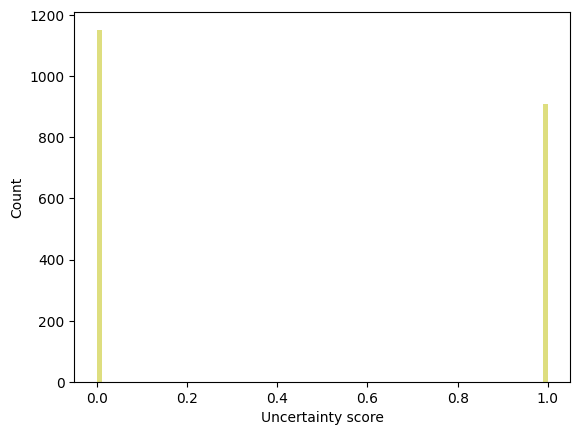

: 

In [37]:
#Strategy_QA + decomposition
    
#Classical truth + uncertainty
trimmer = Trimmer(r'\[.*\]', "[]")
df = pd.read_json("", lines=True)
df["answer"] = df["answer"].apply(lambda x: 1 if x else 0)
df["pred-answer"] = df['gpt-answer'].apply(trimmer.get_split)
pred_answers = df["pred-answer"].apply(lambda x: to_binary(x, 50)).values
real_answers = df["answer"].values
print('acc', accuracy_score(real_answers, pred_answers))
confidences = df["pred-answer"].apply(lambda x: abs(x - 50) / 50).values
# brier score
brier_score = brier_score_loss(real_answers, pred_answers, sample_weight=confidences)
print(f'Brier score: {brier_score}')

#plots
from matplotlib import pyplot
bins = np.linspace(0, 1, 100)
pyplot.hist(pred_answers, bins, alpha=0.5, color='y')
#pyplot.title('GPT Uncertainty scores')
pyplot.xlabel('Uncertainty score')
pyplot.ylabel('Count')
#pyplot.legend([''], loc='upper right')
pyplot.show()


from matplotlib import pyplot
bins = np.linspace(0, 100, 100)
truth = df['gpt-answer'].apply(trimmer.get_split)
pyplot.hist(truth.values, bins, alpha=0.5, color='y')
#pyplot.title('GPT Uncertainty scores')
pyplot.xlabel('Truth score')
pyplot.ylabel('Count')
#pyplot.legend([''], loc='upper right')
pyplot.show()

cf_matrix = confusion_matrix(real_answers, pred_answers)

cf_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cf_normalized, annot=True, cmap='Blues', fmt=".2%", cbar_kws={'label': 'Confidence'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Confidence Values')
plt.show()

reliability = calibration_curve(real_answers, confidences, n_bins=10, pos_label=1, strategy='quantile')
x_interp = np.linspace(0, 1, 10)
y_interp = np.interp(x_interp, reliability[1], reliability[0])
plt.xlabel('GPT Predicted Confidence', size=12)
plt.ylabel('Actual Confidence', size=12)
line1, = plt.plot([0, 1], [0, 1], linestyle='--', linewidth=2)
line2, = plt.plot(reliability[1], reliability[0], linewidth=2)
#line3, = plt.plot(x_interp, y_interp, linewidth=2)
legend = plt.legend(handles=[line1, line2], labels=['Perfect Prediction', 'GPT-4'], fontsize='x-large')
plt.show()
print('Expected Calibration Error (ECE)', np.mean(np.abs(reliability[0] - reliability[1])))

Experiment: First attempt at semantic similarity analysis for decomposition

In [ ]:
#Extract decompositions generated by GPT
trimmer_decomposition = Trimmer(r'\([A-Z]\)', "")
df['gpt-decomposition'] = df['gpt-answer'].apply(trimmer_decomposition.get_decompositions)

#categorize right/wrong labelled and semantic sim
sentence_scores = []
wrong_scores = []
right_scores = []
for index, row in df.iterrows():
    
    #sim = sentence_similarity(row['decomposition'], row['gpt-decomposition'])
    sim = semantic_sim(row['decomposition'], row['gpt-decomposition'], transformer_embed)
    #sim = tfid_sim(row['decomposition'], row['gpt-decomposition'])
    sentence_scores.append(sim)

    if to_binary(row['pred-answer'], 50) == row['answer']:
        right_scores.append(sim)
    else:
        wrong_scores.append(sim)

df['semantic-similarity'] = sentence_scores

#plot histogram
from matplotlib import pyplot
bins = np.linspace(0, 1, 100)
pyplot.hist(wrong_scores, bins, alpha=0.5, color='y')
pyplot.hist(right_scores, bins, alpha=0.5, color='b')
#pyplot.title('GPT Uncertainty scores')
pyplot.xlabel('Semantic Sim')
pyplot.ylabel('Count')
pyplot.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\mauri\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\mauri\AppData\Local\Temp\ipykernel_22996\2638319448.py", line 12, in <module>
    sim = semantic_sim(row['decomposition'], row['gpt-decomposition'], transformer_embed)
  File "c:\Users\mauri\OneDrive\Documents\McGill\2023 Fall\COMP 400\misinfo_explainability\misinfo_explainability\BSDetector.py", line 420, in semantic_sim
  File "c:\Users\mauri\OneDrive\Documents\McGill\2023 Fall\COMP 400\misinfo_explainability\misinfo_explainability\BSDetector.py", line 461, in transformer_embed
  File "c:\Users\mauri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\mauri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\p

Experiment: Semantic similarity analysis with right/corresponding matching for decomposition

In [ ]:
#Extract decompositions generated by GPT
trimmer_decomposition = Trimmer(r'\([A-Z]\)', "")
df['gpt-decomposition'] = df['gpt-answer'].apply(trimmer_decomposition.get_decompositions)

#categorize right/wrong labelled and semantic sim
sentence_scores = []
wrong_scores = []
right_scores = []
for index, row in df.iterrows():
    
    #sim = sentence_similarity(row['decomposition'], row['gpt-decomposition'])
    sim = semantic_sim2(row['decomposition'], row['gpt-decomposition'], tfid_embed)
    #sim = tfid_sim(row['decomposition'], row['gpt-decomposition'])
    sentence_scores.append(sim)

    if to_binary(row['pred-answer'], 50) == row['answer']:
        right_scores.append(sim)
    else:
        wrong_scores.append(sim)

df['semantic-similarity'] = sentence_scores

#plot histogram
from matplotlib import pyplot
bins = np.linspace(0, 1, 100)
pyplot.hist(wrong_scores, bins, alpha=0.5, color='y')
pyplot.hist(right_scores, bins, alpha=0.5, color='b')
#pyplot.title('GPT Uncertainty scores')
pyplot.xlabel('Semantic Sim')
pyplot.ylabel('Count')
pyplot.show()

NameError: name 'df' is not defined

acc 0.7996118389131489
Brier score: 0.16647302904564318


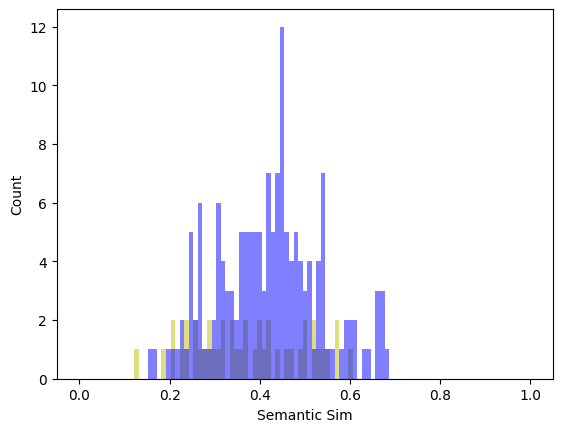

0.42034241881266987
0.37537404777357664
0.11506425224511636
0.12008815774065447


In [ ]:

trimmer = Trimmer(r'\[.*\]', "[]")
df = pd.read_json("", lines=True)
df["answer"] = df["answer"].apply(lambda x: 1 if x else 0)
df["pred-answer"] = df['gpt-answer'].apply(trimmer.get_split)
pred_answers = df["pred-answer"].apply(lambda x: to_binary(x, 50)).values
real_answers = df["answer"].values
print('acc', accuracy_score(real_answers, pred_answers))
confidences = df["pred-answer"].apply(lambda x: abs(x - 50) / 50).values
# brier score
brier_score = brier_score_loss(real_answers, pred_answers, sample_weight=confidences)
print(f'Brier score: {brier_score}')

#Extract decompositions generated by GPT
trimmer_decomposition = Trimmer(r'\([A-Z]\)', "")
df['gpt-decomposition'] = df['gpt-answer'].apply(trimmer_decomposition.get_decompositions)

#categorize right/wrong labelled and semantic sim
sentence_scores = []
wrong_scores = []
right_scores = []
sample_df = df.sample(200)
for index, row in sample_df.iterrows():
    
    #sim = sentence_similarity(row['decomposition'], row['gpt-decomposition'])
    sim = semantic_sim(row['decomposition'], row['gpt-decomposition'], word2vec_embed)
    #sim = tfid_sim(row['decomposition'], row['gpt-decomposition'])
    sentence_scores.append(sim)

    if to_binary(row['pred-answer'], 50) == row['answer']:
        right_scores.append(sim)
    else:
        wrong_scores.append(sim)

#df['semantic-similarity'] = sentence_scores
        
#plot histogram
from matplotlib import pyplot
bins = np.linspace(0, 1, 100)
pyplot.hist(wrong_scores, bins, alpha=0.5, color='y')
pyplot.hist(right_scores, bins, alpha=0.5, color='b')
#pyplot.title('GPT Uncertainty scores')
pyplot.xlabel('Semantic Sim')
pyplot.ylabel('Count')
pyplot.show()

print(np.mean(right_scores))
print(np.mean(wrong_scores))
print(np.std(right_scores))
print(np.std(wrong_scores))
    


Experiment: Decomposition on LIAR dataset

acc 0.6424625098658248
Brier score: 0.29996924969249694


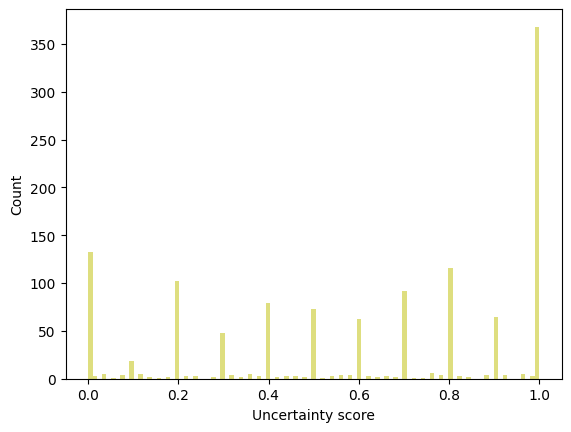

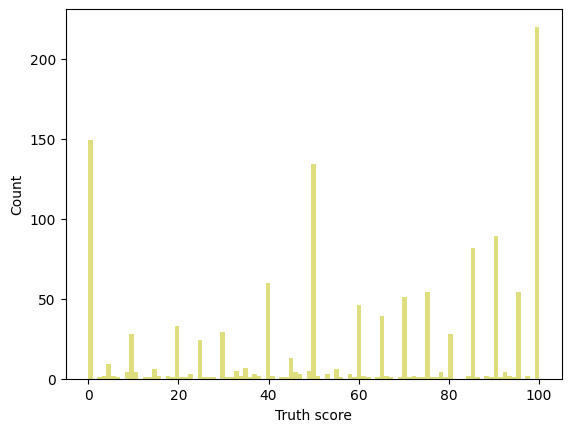

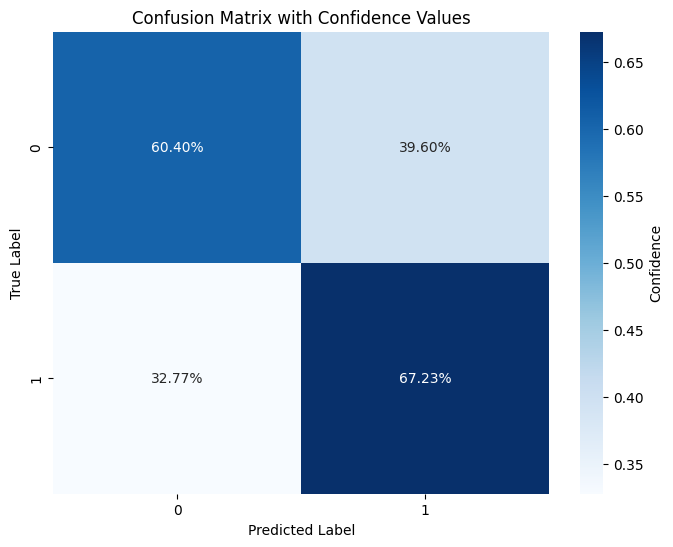

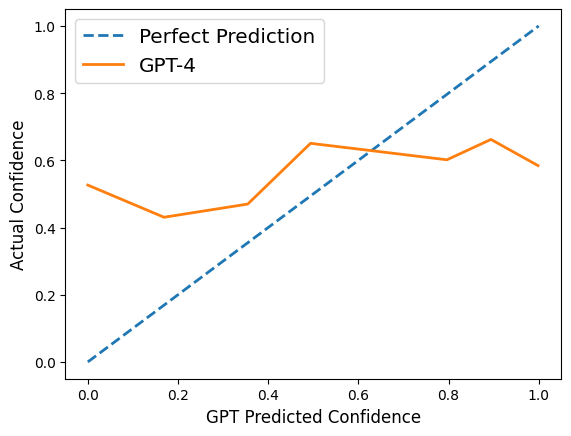

Expected Calibration Error (ECE) 0.24097446865077216


In [ ]:
#Strategy_QA + decomposition
    
#Classical truth + uncertainty
trimmer = Trimmer(r'\[.*\]', "[]")
df = pd.read_json("", lines=True)
df["answer"] = df["label"].apply(lambda x: to_binary(x, 3))
df["pred-answer"] = df['gpt-answer'].apply(trimmer.get_split)
pred_answers = df["pred-answer"].apply(lambda x: to_binary(x, 60)).values ##################################
real_answers = df["answer"].values
print('acc', accuracy_score(real_answers, pred_answers))
confidences = df["pred-answer"].apply(lambda x: abs(x - 50) / 50).values
# brier score
brier_score = brier_score_loss(real_answers, pred_answers, sample_weight=confidences)
print(f'Brier score: {brier_score}')

#plots
from matplotlib import pyplot
bins = np.linspace(0, 1, 100)
pyplot.hist(confidences, bins, alpha=0.5, color='y')
#pyplot.title('GPT Uncertainty scores')
pyplot.xlabel('Uncertainty score')
pyplot.ylabel('Count')
#pyplot.legend([''], loc='upper right')
pyplot.show()


from matplotlib import pyplot
bins = np.linspace(0, 100, 100)
truth = df['gpt-answer'].apply(trimmer.get_split)
pyplot.hist(truth.values, bins, alpha=0.5, color='y')
#pyplot.title('GPT Uncertainty scores')
pyplot.xlabel('Truth score')
pyplot.ylabel('Count')
#pyplot.legend([''], loc='upper right')
pyplot.show()

cf_matrix = confusion_matrix(real_answers, pred_answers)

cf_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cf_normalized, annot=True, cmap='Blues', fmt=".2%", cbar_kws={'label': 'Confidence'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Confidence Values')
plt.show()

reliability = calibration_curve(real_answers, confidences, n_bins=10, pos_label=1, strategy='quantile')
x_interp = np.linspace(0, 1, 10)
y_interp = np.interp(x_interp, reliability[1], reliability[0])
plt.xlabel('GPT Predicted Confidence', size=12)
plt.ylabel('Actual Confidence', size=12)
line1, = plt.plot([0, 1], [0, 1], linestyle='--', linewidth=2)
line2, = plt.plot(reliability[1], reliability[0], linewidth=2)
#line3, = plt.plot(x_interp, y_interp, linewidth=2)
legend = plt.legend(handles=[line1, line2], labels=['Perfect Prediction', 'GPT-4'], fontsize='x-large')
plt.show()
print('Expected Calibration Error (ECE)', np.mean(np.abs(reliability[0] - reliability[1])))

Semantic analysis of those decompositions

In [ ]:
reference_file=''
observed_folder='' #
verb_file = ''
bs = BSDetector(reference_file, verb_file, observed_folder, sample_avg_dev, 
                min_max_scale, Trimmer(r'\b(0|[1-9][0-9]?|100)\b','|'), True)
bs.get_df()
bs.set_alpha(4)
bs.semantic_analysis(tfid_embed)

This is the ece_score: 0.0419 for beta 0.9


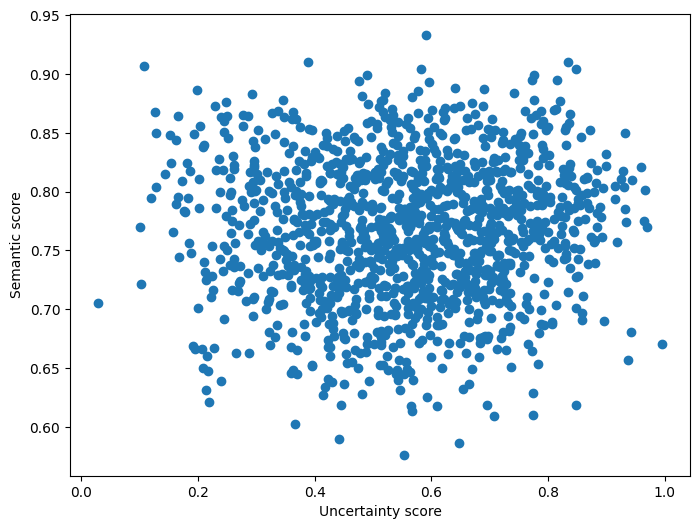

Correlation coefficient: 0.04787667842639532


In [ ]:


plt.figure(figsize=(8,6))
plt.scatter(bs.df['overall-confidence'].values, bs.df['semantic-analysis'].values, marker='o')
plt.xlabel('Uncertainty score')
plt.ylabel('Semantic score')
plt.show()

correlation = bs.df['overall-confidence'].corr(bs.df['semantic-analysis'])
print(f'Correlation coefficient: {correlation}')

Simple web retrieval experiments


In [2]:
import cohere

def basic_retrieval(message, co):

    
    response = co.chat(message=message + "?", connectors=[{"id": "web-search"}])

    return response.text

def uncertainty_score(answer):
    return (abs(answer - 50) / 50)

def add_resolutions(df, co):

    df['additional-context'] = None

    for index, row in df.iterrows():

        if uncertainty_score(row['pred-answer']) < 0.7:

            context_list = []
            for index, decomposition in enumerate(row['gpt-decomposition']):

                if index <= 2:
                    context_list.append(decomposition[0] + '? ' + basic_retrieval(decomposition[0], co))
            context = '\n'.join(context_list)
            df.loc[index, 'additional-context'] = context        

        else:
            df.loc[index, 'additional-context'] = 'No additional context'                

    return df


In [3]:
#Liar_new analysis
df = pd.read_json('',lines=True)
df["answer"] = df["label"].apply(from_pants_on_fire)

final_trimmer = Trimmer(r'\|.*\|', "||")
df["pred-answer"] = df["gpt-answer"].apply(final_trimmer.get_split)

pred_answers = df["pred-answer"].apply(lambda x: to_binary(x, 60)).values
real_answers = df["answer"].values
print('acc', accuracy_score(real_answers, pred_answers))
confidences = df["pred-answer"].apply(lambda x: abs(x - 50) / 50).values
# brier score
brier_score = brier_score_loss(real_answers, pred_answers, sample_weight=confidences)

trimmer_decomposition = Trimmer(r'\([A-Z]\)', "")
df['gpt-decomposition'] = df['gpt-answer'].apply(trimmer_decomposition.get_decompositions)

test_df = df.sample(200)

co = cohere.Client(os.getenv("COHERE_CLIENT_API"))

test_df = add_resolutions(test_df, co)

test_df.to_json('resolution_df.json', orient='records', lines=True)


acc 0.768


In [28]:
test_df = pd.read_json('resolution_df.jsonl',lines=True)
test_df = test_df.iloc[:-3]

print(test_df.columns)

preds = test_df['gpt-answer'].apply(final_trimmer.get_split)

print('acc', accuracy_score(test_df['answer'].values, preds.apply(lambda x: to_binary(x, 60)).values))
print('acc', accuracy_score(test_df['answer'].values, test_df['pred-answer'].apply(lambda x: to_binary(x, 60)).values))

Index(['example_id', 'text', 'label', 'date', 'messages', 'temperature',
       'model', 'max_tokens', 'gpt-answer', 'gpt-message', 'prompt_tokens',
       'completion_tokens', 'answer', 'pred-answer', 'gpt-decomposition',
       'additional-context'],
      dtype='object')
acc 0.77
acc 0.77


acc 0.79
Brier score: 0.16782522343594833


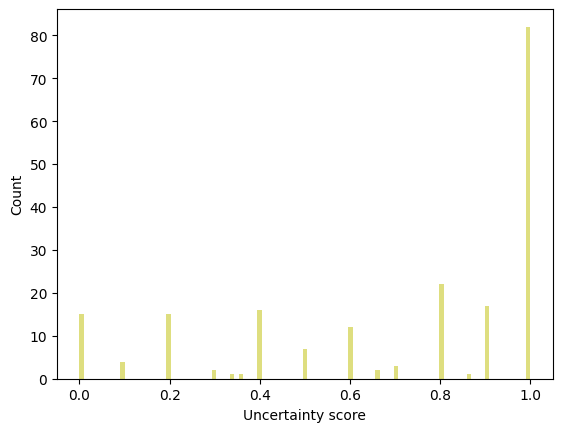

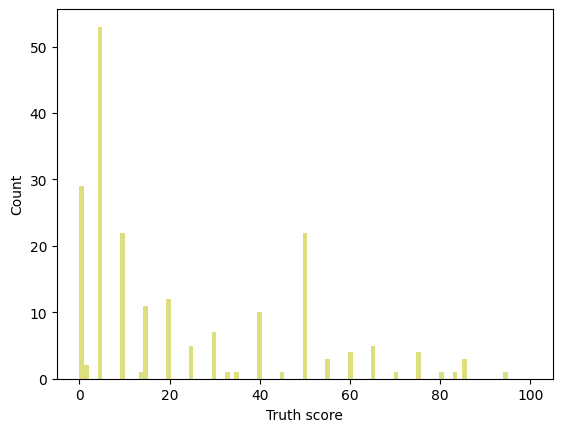

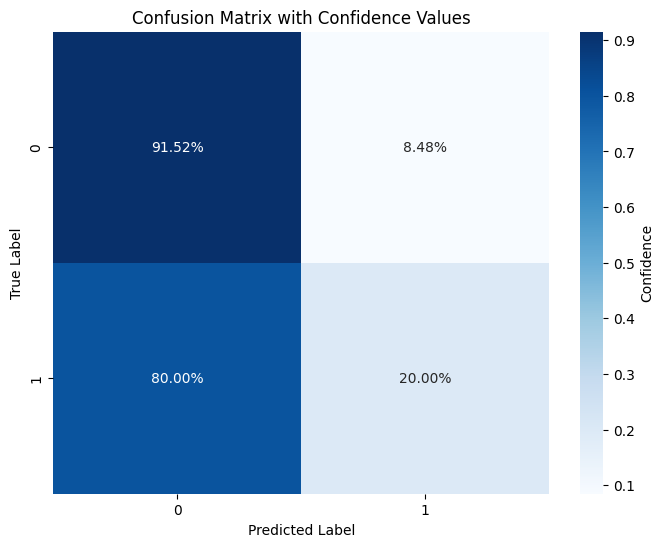

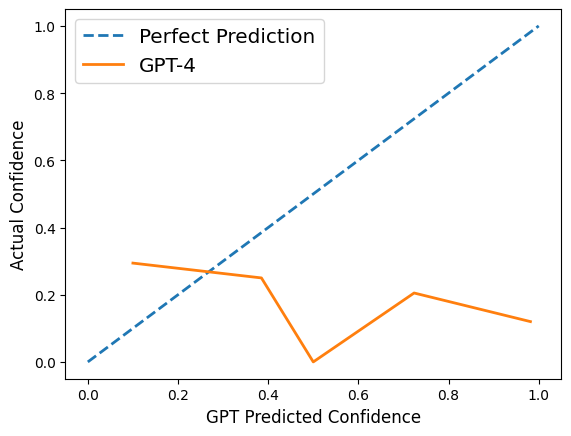

Expected Calibration Error (ECE) 0.4418358371040725


In [2]:
#Classical truth + uncertainty
trimmer = Trimmer(r'\[.*\]', "[]")
df = pd.read_json("", lines=True)
df = df.iloc[:200]
pred_answers = df['gpt-answer_y'].apply(trimmer.get_split)
pred_answers = pred_answers.apply(lambda x: to_binary(x, 60)).values 
real_answers = df["answer"].values

print('acc', accuracy_score(real_answers, pred_answers))
confidences = df["pred-answer"].apply(lambda x: abs(x - 50) / 50).values
# brier score
brier_score = brier_score_loss(real_answers, pred_answers, sample_weight=confidences)
print(f'Brier score: {brier_score}')

#plots
from matplotlib import pyplot
bins = np.linspace(0, 1, 100)
pyplot.hist(confidences, bins, alpha=0.5, color='y')
#pyplot.title('GPT Uncertainty scores')
pyplot.xlabel('Uncertainty score')
pyplot.ylabel('Count')
#pyplot.legend([''], loc='upper right')
pyplot.show()


from matplotlib import pyplot
bins = np.linspace(0, 100, 100)
truth = df['gpt-answer_y'].apply(trimmer.get_split)
pyplot.hist(truth.values, bins, alpha=0.5, color='y')
#pyplot.title('GPT Uncertainty scores')
pyplot.xlabel('Truth score')
pyplot.ylabel('Count')
#pyplot.legend([''], loc='upper right')
pyplot.show()

cf_matrix = confusion_matrix(real_answers, pred_answers)

cf_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cf_normalized, annot=True, cmap='Blues', fmt=".2%", cbar_kws={'label': 'Confidence'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Confidence Values')
plt.show()

reliability = calibration_curve(real_answers, confidences, n_bins=10, pos_label=1, strategy='quantile')
x_interp = np.linspace(0, 1, 10)
y_interp = np.interp(x_interp, reliability[1], reliability[0])
plt.xlabel('GPT Predicted Confidence', size=12)
plt.ylabel('Actual Confidence', size=12)
line1, = plt.plot([0, 1], [0, 1], linestyle='--', linewidth=2)
line2, = plt.plot(reliability[1], reliability[0], linewidth=2)
#line3, = plt.plot(x_interp, y_interp, linewidth=2)
legend = plt.legend(handles=[line1, line2], labels=['Perfect Prediction', 'GPT-4'], fontsize='x-large')
plt.show()
print('Expected Calibration Error (ECE)', np.mean(np.abs(reliability[0] - reliability[1])))

In [4]:
final_trimmer = Trimmer(r'\|.*\|', "||")

c = 0
for index, row in df.iterrows():

    if to_binary(final_trimmer.get_split(row['gpt-answer_x']), 60) != to_binary(trimmer.get_split(row['gpt-answer_y']), 60):
        c +=1

print(f'This basic retrieval changed the answers of {c}/200 predictions')




This basic retrieval changed the answers of 29/200 predictions


acc 0.77


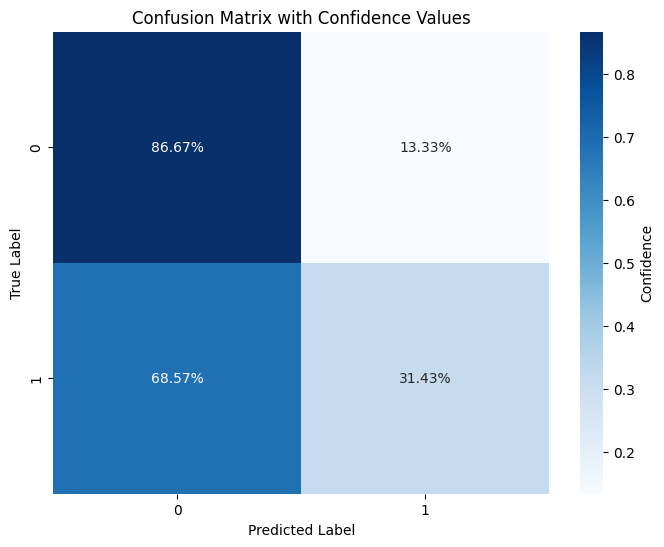

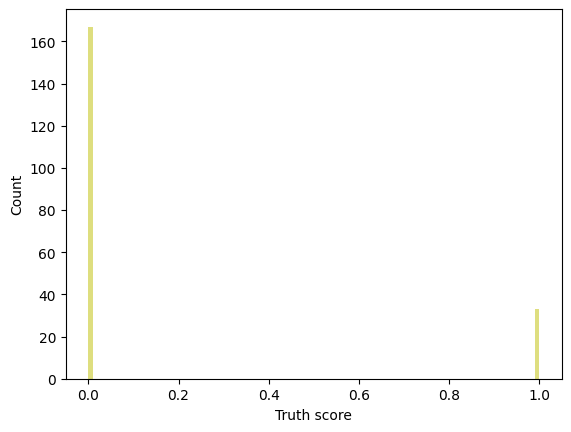

In [6]:
df["pred-answer"] = df['gpt-answer_x'].apply(final_trimmer.get_split)
pred_answers = df["pred-answer"].apply(lambda x: to_binary(x, 60)).values 
real_answers = df["answer"].values
print('acc', accuracy_score(real_answers, pred_answers))

cf_matrix = confusion_matrix(real_answers, pred_answers)

cf_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cf_normalized, annot=True, cmap='Blues', fmt=".2%", cbar_kws={'label': 'Confidence'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Confidence Values')
plt.show()

bins = np.linspace(0, 100, 100)
plt.hist(df['pred-answer'], bins, alpha=0.5, color='y')
#pyplot.title('GPT Uncertainty scores')
plt.xlabel('Truth score')
plt.ylabel('Count')
#pyplot.legend([''], loc='upper right')
plt.show()